In [1]:
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
from glob import glob
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image                  
from tqdm import tqdm
from PIL import ImageFile


Using TensorFlow backend.


In [2]:
# function for loading datasets
def load_dataset(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np_utils.to_categorical(np.array(data['target']), 10)
    return files, targets

# loading train, test, and validation datasets
train_files, train_targets = load_dataset('imgs/train')
test_files, test_targets = load_dataset('imgs/test')


# load list of names
names = [item[17:19] for item in sorted(glob("imgs/train/*/"))]

# break training set into training and validation sets
train_files, valid_files, train_targets, valid_targets = train_test_split(train_files, train_targets, test_size=0.2, random_state=42)

# statistics regarding dataset
print('There are %s total images.\n' % len(np.hstack([train_files, valid_files, test_files])))
print('There are %d training images.' % len(train_files))
print('There are %d total training categories.' % len(names))
print('There are %d validation images.' % len(valid_files))
print('There are %d test images.'% len(test_files))

There are 22424 total images.

There are 17939 training images.
There are 10 total training categories.
There are 4485 validation images.
There are 0 test images.


In [3]:
df = pd.read_csv("driver_imgs_list.csv",header='infer')
print(df['classname'].head(100))
print(df.iloc[:,1].describe())
print("\nlabel   #")
print(df['classname'].value_counts(sort=False))

0     c0
1     c0
2     c0
3     c0
4     c0
      ..
95    c1
96    c1
97    c1
98    c1
99    c1
Name: classname, Length: 100, dtype: object
count     22424
unique       10
top          c0
freq       2489
Name: classname, dtype: object

label   #
c3    2346
c6    2325
c1    2267
c4    2326
c7    2002
c2    2317
c8    1911
c0    2489
c9    2129
c5    2312
Name: classname, dtype: int64


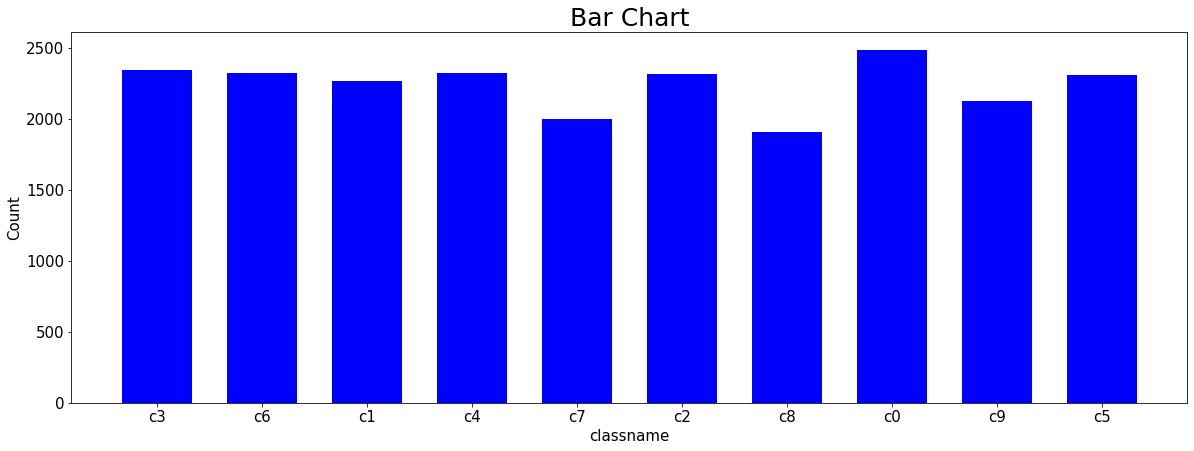

In [4]:
%matplotlib inline

nf = df['classname'].value_counts(sort=False)
labels = df['classname'].value_counts(sort=False).index.tolist()
y = np.array(nf)
width = 1/1.5
N = len(y)
x = range(N)

fig = plt.figure(figsize=(20,15))
ay = fig.add_subplot(211)

plt.xticks(x, labels, size=15)
plt.yticks(size=15)

ay.bar(x, y, width, color="blue")

plt.title('Bar Chart',size=25)
plt.xlabel('classname',size=15)
plt.ylabel('Count',size=15)

plt.show()

In [5]:
def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(224, 224))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

In [ ]:
# rescaling images by dividing every pixel in every image by 255. 
# subtract 0.5 to ensure the mean is zero
                     
ImageFile.LOAD_TRUNCATED_IMAGES = True                 

# pre-process the data for Keras
train_tensors = paths_to_tensor(train_files).astype('float32')/255 - 0.5
valid_tensors = paths_to_tensor(valid_files).astype('float32')/255 - 0.5
test_tensors = paths_to_tensor(test_files).astype('float32')/255 - 0.5

100%|██████████| 17939/17939 [01:44<00:00, 171.48it/s]
